# Capítulo 4. Modelos de Entrenamiento

## Modelos de Entrenamiento — Qué son y para qué sirven

---

## 1. Regresión Lineal
**Qué es:**  
Un modelo que busca una relación lineal entre variables predictoras y una variable objetivo.

**Para qué sirve:**  
- Predecir valores numéricos continuos.
- Modelar relaciones simples entre variables.

---

### 1.1 Ecuación Normal
**Qué es:**  
Una fórmula cerrada que calcula directamente los parámetros óptimos sin iteraciones.

**Para qué sirve:**  
- Entrenar regresión lineal de manera exacta.
- Funciona bien con datasets pequeños o medianos.

---

### 1.2 Regresor Lineal de Scikit-Learn
**Qué es:**  
La implementación en scikit-learn del modelo de regresión lineal.

**Para qué sirve:**  
- Entrenar modelos lineales fácilmente.
- Integrarse con validación, métricas y pipelines.

---

## 2. Descenso del Gradiente
**Qué es:**  
Un método iterativo para optimizar parámetros reduciendo el error paso a paso.

**Para qué sirve:**  
- Entrenar modelos cuando no existe solución cerrada.
- Escalar a grandes volúmenes de datos.

---

### 2.1 Descenso del Gradiente por Lote (Batch GD)
**Qué es:**  
Actualiza los parámetros usando todo el dataset en cada iteración.

**Para qué sirve:**  
- Obtener actualizaciones precisas y estables.

---

### 2.2 Descenso del Gradiente Estocástico (SGD)
**Qué es:**  
Actualiza los parámetros usando una sola muestra en cada iteración.

**Para qué sirve:**  
- Entrenar rápidamente con datos grandes.
- Explorar mejor el espacio de soluciones (aunque con más ruido).

---

## 3. Regresión Polinomial
**Qué es:**  
Extiende la regresión lineal agregando términos polinomiales para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar curvas y patrones complejos.
- Ajustar relaciones no lineales entre variables.

---

## 4. Curvas de Aprendizaje
**Qué es:**  
Gráficos que muestran el rendimiento del modelo en función del número de ejemplos o iteraciones.

**Para qué sirve:**  
- Diagnosticar sobreajuste (overfitting) y subajuste (underfitting).
- Decidir si se necesita más datos o un modelo más complejo.

---

## 5. Regularización de Modelos Lineales
**Qué es:**  
Métodos que penalizan parámetros grandes para evitar sobreajuste.

**Para qué sirve:**  
- Mejorar la capacidad de generalización.
- Controlar la complejidad del modelo.

---

### 5.1 Ridge (Regularización L2)
**Qué es:**  
Penalización basada en el cuadrado de los coeficientes.

**Para qué sirve:**  
- Reducir sobreajuste manteniendo coeficientes pequeños.
- Funciona bien con variables correlacionadas.

---

### 5.2 Lasso (Regularización L1)
**Qué es:**  
Penalización basada en la suma de los valores absolutos de los coeficientes.

**Para qué sirve:**  
- Realizar selección de características (coeficientes se vuelven cero).
- Simplificar modelos automáticamente.

---

### 5.3 Elastic Net
**Qué es:**  
Combinación de las penalizaciones L1 y L2.

**Para qué sirve:**  
- Aprovechar beneficios de Ridge y Lasso.
- Manejar datasets con variables muy correlacionadas.

---

## 6. Regresión Logística
**Qué es:**  
Modelo lineal que utiliza la función sigmoide para estimar probabilidades.

**Para qué sirve:**  
- Resolver problemas de clasificación binaria.
- Interpretar resultados como probabilidades.

---

## 7. Regresión Softmax
**Qué es:**  
Extensión de la regresión logística para múltiples clases.

**Para qué sirve:**  
- Clasificación multiclase.
- Modelos donde las clases son mutuamente excluyentes.


## <span style="color:green">1. Regresión Lineal</span>

#### <span style="color:blue"> 1.1 Ecuación Normal </span>

In [2]:
# Importar las librerías, numpy, matplotlib, pandas
# numpy es la bibleoteca por exelencia de matemáticas para python
import numpy as np
import pandas as pd
#Importar matplotlib porque vamos a estar haciendo gráficas
import matplotlib.pyplot as plt


In [3]:
#Generar el set de jueguete de datos lineales aleatorios 
set_num = np.random.rand(100,1)

# Genera vector de valores que vas a estar prediciendo (añade un factor de aleatoriedad)
# (con la formula de lo del modelo de regresion de los apuntes )
vector = 2 + 2 * set_num + np.random.rand(100,1)

In [4]:
set_num.shape

(100, 1)

In [5]:
vector.shape

(100, 1)

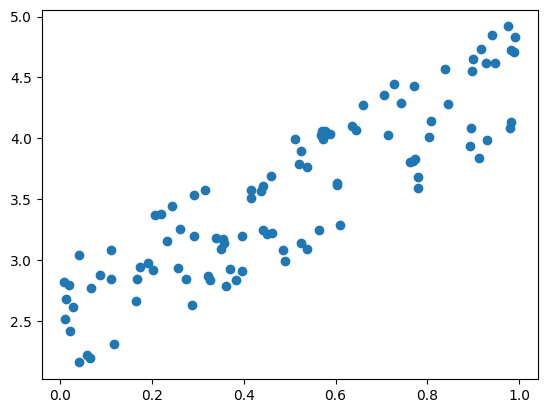

In [6]:
#Gráfica los datos del set de juguete 
plt.scatter(set_num,vector)
plt.show()

In [7]:
#Agregar el valor de x0
sig_set = np.c_[np.ones((100,1)),set_num]

#Aplicar la ecuación normal 
ec_normal = np.linalg.inv(sig_set.T.dot(sig_set)).dot(sig_set.T).dot(vector)
#Visualiza  
ec_normal

array([[2.50721726],
       [2.0604896 ]])

👀: Aquí no tendrán los mismos datos que yo, es normal por los factores de aleatoriedad

📝:El primer valor de la matriz es la pendiente y el segundo es la intersección 

In [8]:
#Prueba estes datos con un vector de prueba
set_prueba = np.array([[0],[1]])

In [9]:
#Agregar X0=1
set_prueba_2 = np.c_[np.ones((2,1)),set_prueba]

In [10]:
#Hacer las predicciones con la ecuación normal
predicciones = set_prueba_2.dot(ec_normal)
predicciones


array([[2.50721726],
       [4.56770686]])

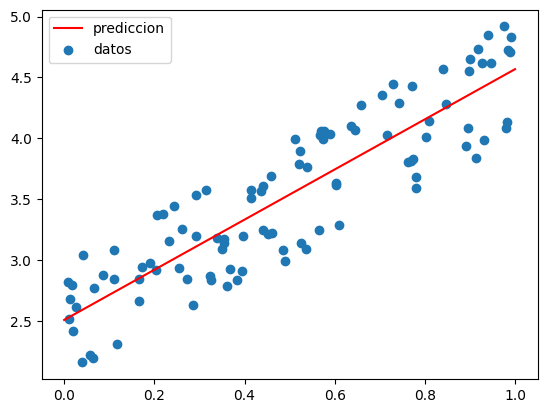

In [11]:
# Grafica la regresión con los datos originales y la predicción
plt.plot(set_prueba, predicciones, label='prediccion', color='r')
plt.scatter(set_num, vector, label='datos')
plt.legend()
plt.show()

#### <span style="color:blue"> 1.2 Regresor Linear de Scikit </span>

In [12]:
#Haz la regresión con scikit 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(set_num,vector)

#Cálcula la intersección y la pendiente con este método
reg.intercept_, reg.coef_

(array([2.50721726]), array([[2.0604896]]))

Los parámetros son iguales a los que obtuvimos en el método anterior. En este caso, tendrías que evaluar el costo que implica cada método a tu ordenador. 

***

## <span style="color:green">2. Descenso del Gradiente</span>

Algoritmo de optimización. Signfica una alternativa a la ecuación normal

#### <span style="color:blue"> 2.1 Descenso del Gradiente por Lote</span>

**Derivada parcial de la función de costo (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Vector del Gradiente de la función de costo** 

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Step del descenso del Gradiente**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [13]:
# Definir la tasa de aprendizaje (ra=(valor que queramos darle))
ra = 0.1
#Definir las iteraciones. 1000 es un estándar. En 1000 se va a detener
iteraciones = 1000
#Número de datos 
m = len(set_num)
#Incializa la pendiente 
b0 = np.random.rand(2,1)

In [14]:
#Hacer el programa para el descenso del gradiente
for iter in range(iteraciones):

    #Expresión a manera de álgebra lineal de los mínimos cuadrados (función de costo)
    gradiente = 2/m * sig_set.T.dot(sig_set.dot(b0) - vector)
    b0 = b0 - ra * gradiente
b0

array([[2.50721747],
       [2.06048919]])

Los resultados nos da extremadamente cercano a los datos obtenidos con la ecuación normal. Ojo: recuerda que el descenso del gradiente es un método de aproximación !!!

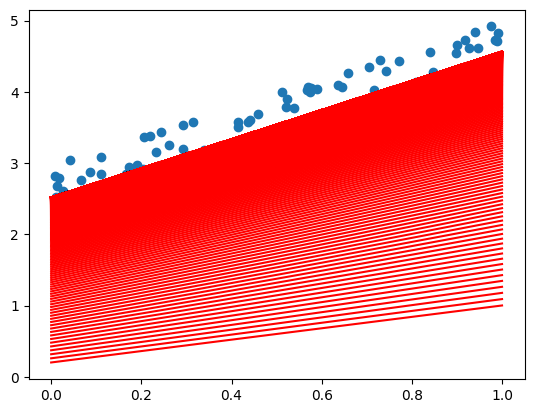

array([[ 0.00055232],
       [-0.0010433 ]])

In [15]:
#Repetir el ejercicio pero con ritmo de tasa de aprendizaje diferente 
ra2 = 0.01
iteraciones2 = 1000
m2 = len(set_num)
b1 = np.random.rand(2,1)

plt.scatter(set_num,vector,label='datos')

#Visualiza los modelos que va proponiendo hasta llegar a la predicción final 
for iter in range(iteraciones2):
    gradiente1 = 2/m2 * sig_set.T.dot(sig_set.dot(b1) - vector)
    b1 = b1 - ra2 * gradiente1
    y_new = set_prueba_2.dot(b1)
    plt.plot(set_prueba, y_new,"r-")
plt.show()
gradiente1



**Ejercicio Extra**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch 

***

#### <span style="color:blue"> 2.2 Descenso del Gradiente Estocástico</span>

Debido a qué la complejidad computacional del descenso del gradiente de lote es alto, podemos ver el descenso del gradiente estocástico para poder mejorar las predicción.

**Ventajas**: Puedes trabajar con más datos, escapa de los mínimos locales. 
**Desventajas:** No es tan exacto como los otros métodos. Sin embargo, su variación es despreciable

In [16]:
# epochs: cuántas gradientes hará, cuántos datos seleccionará para hacer el gradiente 
epochs = 100
#Calendario de aprendizaje, sirve para definir el ritmo de aprendizaje
lt0,lt1 = 10,100
pendiente = 100
#Definir el horario de aprendizaje
def learning_schedule(t):
    return lt0 / (t + lt1)
#Definir los 2 valores con lo que van a empezar
b0 = np.random.rand(2,1)

#Definir la función 
for iter in range(epochs):
    for i in range(pendiente):
        #Genera un índice aleatorio
        randindex = np.random.randint(pendiente)
        #Valor x de la coordenada que seleccionamos al azar
        xcoor = sig_set[randindex:randindex+1]
        #Valor y de la coordenada que seleccionamos al azar
        ycoor = vector[randindex:randindex+1]
        #Calcular el gradiente (Resultado de la derivada parcial)
        gradiente1 = 2 * xcoor.T.dot(xcoor.dot(b0) - ycoor)
        #Calcular el ritmo de aprendizaje
        ra = learning_schedule(iter * pendiente + i)
        #Calcular los parámetros de intersección y pendiente 
        b0 = b0 - ra * gradiente1
b0

array([[2.5136506 ],
       [2.06596841]])

Aunque existe variación con el resultado de los métodos anteriores, la diferencia es mínima

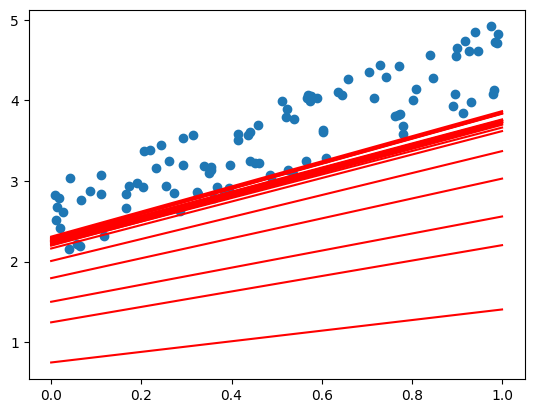

In [17]:
# #Repetir el ejercicio pero desplegando cada gradiente realizado 
epchos = 5
tl, lt1 = 10,100
pendiente = 5

def learning_schedule(t):
    return tl / (t + lt1)
b0 = np.random.rand(2,1)
#Agrega un scatterplot para ver los datos 
plt.scatter(set_num,vector,label='datos')

for iter in range(epchos):
        for i in range(pendiente):
                #Selecciona un índice al azar
                randindex = np.random.randint(pendiente)
                xcoor = sig_set[randindex:randindex+1]
                ycoor = vector[randindex:randindex+1]
                y_new = set_prueba_2.dot(b0)
                #Grafica las líneas rojas que simbolizan los diferentes gradientes a través de las iteraciones. 
                plt.plot(set_prueba, y_new,"r-")
                gradiente1 = 2 * xcoor.T.dot(xcoor.dot(b0) - ycoor)
                ra = learning_schedule(iter * pendiente + i)
                b0 = b0 - ra * gradiente1
plt.show()

In [18]:
#Hacerlo con scikit 
from sklearn.linear_model import SGDRegressor
#La toleración es el límite menor al valor de la suma de los errores al cuadrado 
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
#.ravel: te genera una lista normal 
sgd.fit(set_num,vector.ravel())
#Sacar los parámetros, la intersección y la pendiente 
sgd.intercept_, sgd.coef_

(array([2.5725472]), array([1.95536097]))

In [19]:
#Visualiza la lista normal que genera .ravel
vector.ravel()

array([3.07976771, 3.63448735, 2.9127262 , 2.21523825, 2.41876131,
       3.08656836, 4.28162374, 4.05590867, 3.53655735, 4.02497763,
       2.5173921 , 3.80662691, 2.76732776, 2.1947664 , 4.70800301,
       3.84086482, 3.15611729, 3.03975341, 3.9971742 , 4.73367979,
       4.02559631, 3.24561261, 2.84171511, 3.19633408, 3.6129131 ,
       3.08042051, 3.57824561, 3.22212336, 4.26923597, 3.18165365,
       4.0627458 , 4.03422585, 2.97529944, 3.69200478, 3.21728223,
       4.91838672, 4.65448341, 3.83304484, 2.9936375 , 4.5653966 ,
       3.57521463, 3.19576259, 2.86467759, 2.84047052, 3.98466298,
       4.82965313, 3.6829887 , 2.63220571, 4.61993956, 4.72231891,
       4.08302708, 3.81354354, 4.55094638, 4.00811228, 4.61642359,
       2.82312529, 2.92515523, 3.9325199 , 2.67835264, 4.4270944 ,
       2.61004583, 3.57044332, 4.07013974, 3.17526507, 2.83794168,
       3.79112379, 2.87522628, 2.31153405, 2.93231629, 3.37972737,
       4.09904436, 4.13118162, 2.78984934, 3.3691377 , 3.58817

👀: Con este método si existió una variación importante en los resultados obtenidos. Es cuestión de criterio el sacrificar exactitud por costo computacional o viceversa.

***

## <span style="color:green">3. Regresión polinomial</span>

Regresión polinomial es una regresión linel a la cual le agregamos ecuaciones con potencia más elevada

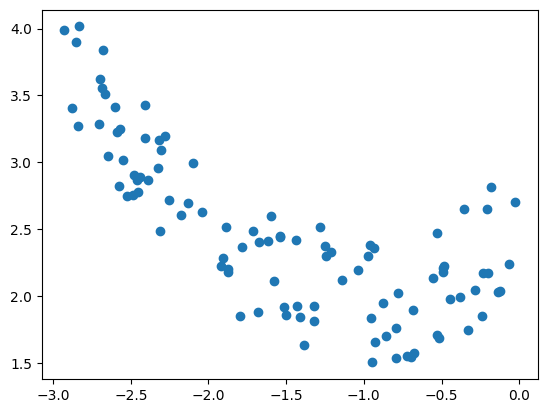

In [47]:
#Generar set de datos de juguete. Añade un toque de aleatoriedad
pendiente = np.random.rand(100,1)
xcoor = 3 * np.random.rand(m,1) - 3
#Elevar la ecuación al 2
y = 2 + xcoor + 0.5 * xcoor**2 + np.random.rand(m,1)
#Gráfica el set de datos 
plt.scatter(xcoor,y)

No hay una función en scikit para hacer regresiones polinomiales como tal. Pero podemos utilizar PolynomialFeature que toma los valores de x y los eleva a una potencia especificada. 

In [48]:
#Importar PolynomialFeatures con una potencia 2
from sklearn.preprocessing import PolynomialFeatures
polys = PolynomialFeatures(degree=2, include_bias=False)
#Transformar las características originales en características polinomiales
x_poly = polys.fit_transform(xcoor)
xcoor[0], x_poly[0]

(array([-0.51829208]), array([-0.51829208,  0.26862668]))

In [49]:
#Hacer una regresión lineal sobre de los datos 
reg_linear = LinearRegression()
reg_linear.fit(x_poly,y)
#Sacar los parámetros de la regresión polinomial
reg_linear.intercept_, reg_linear.coef_

(array([2.35625677]), array([[0.85325097, 0.4617697 ]]))

Primero aparece el dato de la intersección y luego aparece los coeficientes de de x y x2, respectivamente

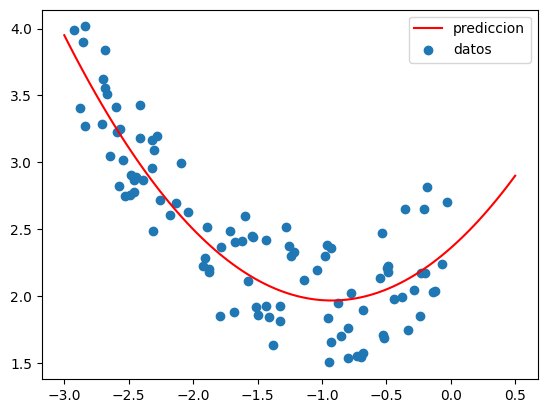

In [ ]:
#Graficar la predicción de PolynomialFeatures y los datos originales
xnueva = np.linspace(-3,0.5,100).reshape(100,1)
#escribir la fórmula a partir del array de arriba 
ynuevo = 2.36 + 0.85 * xnueva + 0.46 * xnueva ** 2
plt.plot(xnueva,ynuevo, color='r', label='prediccion')
plt.scatter(xcoor,y,label='datos')
plt.legend()
plt.show()

**Ejercicio**: calcular la suma de los errores al cuadrado  y compararlo con una predicción lineal

***

## <span style="color:green">4. Curvas de Aprendizaje</span>

In [58]:
#Importar mean_squared_error train_test_split para medir el error sobre los datos de entranamiento y validación
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def curva_aprendizaje(x,y,model):
    #Dividir los datos en entrenamiento y validación
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
    #Generar una lista vacías para irlas rellenando conforme se vaya calculando los errores 
    errores_entrenamiento = []
    errores_valor = []


    #Tomar el set de entrenamiento y ajustándolo al modelo pero solo con un dato de entrenamiento y así sucesivamente 
    for i in range(1, len(x_train)):
        #predecir el modelo 
        model.fit(x_train[:i], y_train[:i])
        #predecir el modelo
        y_predic_train = model.predict(x_train[:i])
        y_val_predic = model.predict(x_test)
        #Calcular los errores
        errores_entrenamiento.append(mean_squared_error(y_train[:i],y_predic_train))
        errores_valor.append(mean_squared_error(y_test,y_val_predic))

        
        #graficarlos
    plt.plot(np.sqrt(errores_entrenamiento),"r-+", label='error entrenamiento')
    plt.plot(np.sqrt(errores_valor),"b-", label='error validación')
    plt.axis([0, len(x_train), 0, 1])
    plt.legend(loc='best')
    

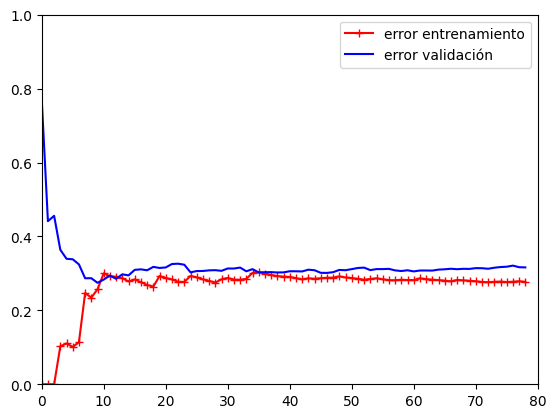

In [59]:
#Correr la curva de aprendizaje
reg_linear = LinearRegression()
curva_aprendizaje(x_poly,y,reg_linear)

In [60]:
#Hacer un pipeline llamado regresion_polinomial que haga una regresión polinomial y lineal 
from sklearn.pipeline import Pipeline
regresion_polinomial = Pipeline([
    ('caracteristicas_polinomicas', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

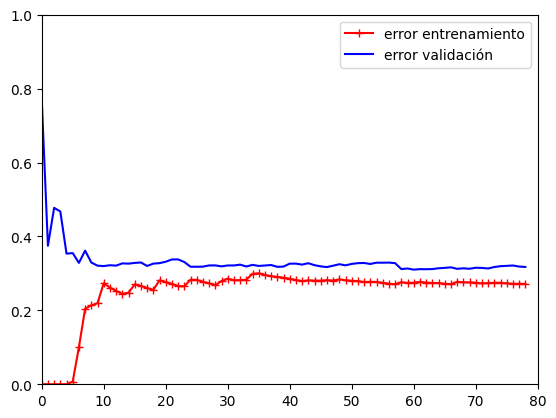

In [62]:
#Ejecutar curvas de aprendizaje a regresion_polinomial 
curva_aprendizaje(x_poly,y,regresion_polinomial)

In [65]:
#Variar el grado del polinomio para mejorar el rendimiento del modelo. Ejemplo:2
from sklearn.pipeline import Pipeline
regresion_polinomial_2 = Pipeline([
    ('caracteristicas_polinomicas', PolynomialFeatures(degree=5, include_bias=False)),
    ('lin_reg', LinearRegression())
])

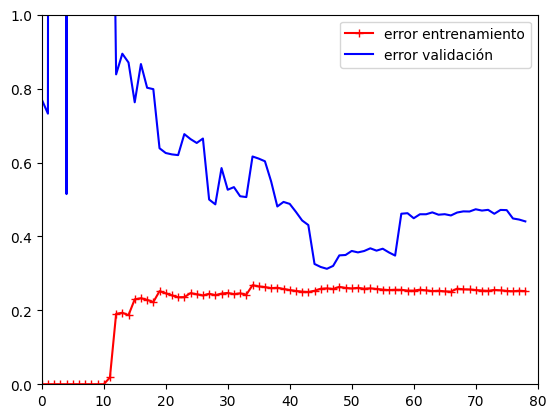

In [66]:
#Correr la curva de aprendizaje
curva_aprendizaje(x_poly,y,regresion_polinomial_2)
#Ejemplo: 5

Generalemnte, cuando las línas se tocan signfica que llegaste a un buen modelo. No esta sobreajustado ni subajustado

***

## <span style="color:green">5. Regularización de Modelos lineales</span>

### <span style="color:blue">5.1 Regresión de Ridge o de Cresta</span>

**Término de regularización en la regresión de Ridge**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Función de costo de la regresión de Ridge**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

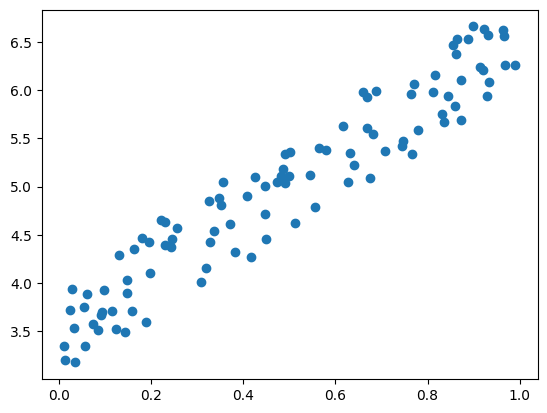

In [74]:
#Hacer un set de juguete 
x = np.random.rand(100,1)
y = 3 + 3 * x + np.random.rand(100,1)
plt.scatter(x,y,label="Datos")
#

In [75]:
#Hacer una regresión lineal sencilla para comparar con la regresión de cresta
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.51043676]), array([[3.02336632]]))

In [76]:
#Generar 100 datos para graficar la linea de predicción  
val_x = np.linspace(0,1,100)
val_y = 3.48 + 3.01 * val_x

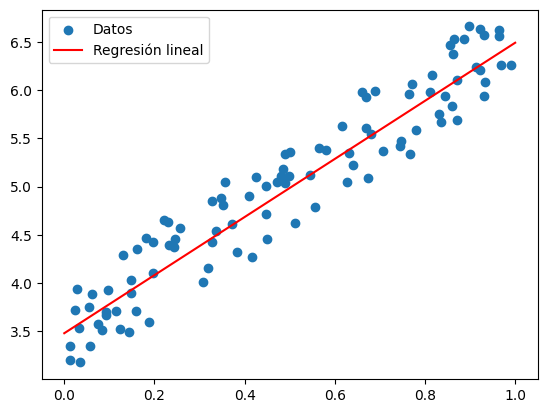

In [77]:
#graficar 
plt.scatter(x,y,label="Datos")
plt.plot(val_x,val_y,"r-",label="Regresión lineal")
plt.legend()
plt.show()

In [78]:
#Importar Ridge para hacer nuestra regresión de cresta 
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x,y)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [79]:
#Calcula los parámetros de ridge
ridge.intercept_, ridge.coef_

(array([3.65441656]), array([2.72752185]))

In [80]:
#Hacer la linea de la predicción de Ridge
crest_x = np.linspace(0,1,100)
crest_y = ridge.intercept_ + ridge.coef_ * crest_x

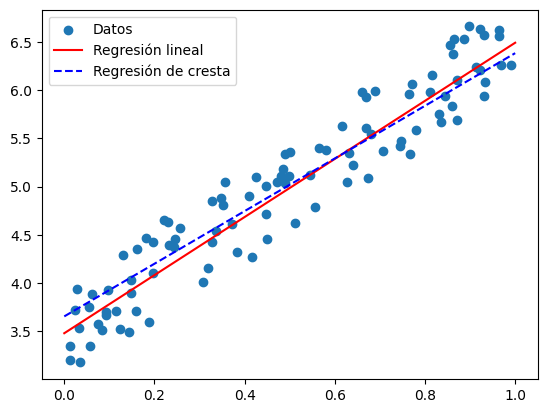

In [87]:
#graficar comparando la regresión lineal y de Ridge
plt.scatter(x,y,label="Datos")
plt.plot(val_x,val_y,"r-",label="Regresión lineal")
plt.plot(crest_x,crest_y,"b--",label="Regresión de cresta")
plt.legend()
plt.show()

***

### <span style="color:blue">5.2 Regresión de Lasso</span>

**Función de costo de la regresión de regresión de Lasso**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [89]:
#Importar lasso
from sklearn.linear_model import Lasso

#Asignar una alpha de 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(x,y)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [90]:
#Calcular los parámetros de intersección y coeficientes de x 
lasso.intercept_, lasso.coef_

(array([4.03831448]), array([1.93870233]))

In [91]:
#Hacer la linea de la predicción de lasso
x_lasso = np.linspace(0,1,100)
y_lasso = lasso.intercept_ + lasso.coef_ * x_lasso

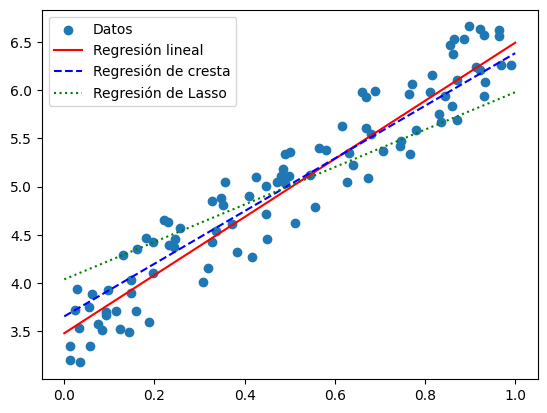

In [92]:
#graficar comparando la regresión lineal, de Ridge y de Lasso
plt.scatter(x,y,label="Datos")
plt.plot(val_x,val_y,"r-",label="Regresión lineal")
plt.plot(crest_x,crest_y,"b--",label="Regresión de cresta")
plt.plot(x_lasso,y_lasso,"g:",label="Regresión de Lasso")
plt.legend()
plt.show()

***

### <span style="color:blue">5.3 Regresión de Red Elástica</span>

**Función de costo de la Regresión de Red Elástica**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [93]:
#Importar ElasticNet
from sklearn.linear_model import ElasticNet
net = ElasticNet(alpha=0.1, l1_ratio=0.5)
net.fit(x,y)

,alpha,0.1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [94]:
#Calcular los parámetros de intersección y coeficientes de x 
net.intercept_, net.coef_

(array([4.19895436]), array([1.60862533]))

In [95]:
#Hacer la linea de la predicción de Red Elástica
x_net = np.linspace(0,1,100)
y_net = net.intercept_ + net.coef_ * x_net

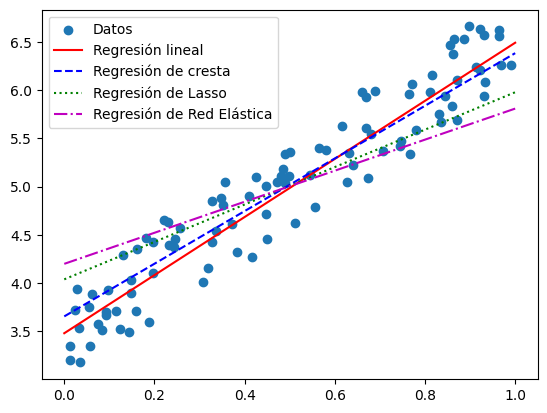

In [96]:
#graficar comparando la regresión lineal, de Ridge, de Lasso y de Red Elástica
plt.scatter(x,y,label="Datos")
plt.plot(val_x,val_y,"r-",label="Regresión lineal")
plt.plot(crest_x,crest_y,"b--",label="Regresión de cresta")
plt.plot(x_lasso,y_lasso,"g:",label="Regresión de Lasso")
plt.plot(x_net,y_net,"m-.",label="Regresión de Red Elástica")
plt.legend()
plt.show()

***

## <span style="color:green">6. Regresión Logistica</span>

**Modelo de Regresión Logística**

$ \hat{p} = L(b^Tx) $

**Función logística**

$ L = \frac {1}{1+e^{-t}} $

**Función de Costo de la Regresión Logística**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivada de la función de Costo**

$ \frac{\partial}{\partial b} J(b) $

In [97]:
#Traer el set de datos
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
             'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
             'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
#Visualizar el set de datos 
df = pd.DataFrame(candidates,columns=['gmat','gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


**KEY:** 
gmat: prueba de coeficiente intelectual
gpa: es tu promedio en la escuela

In [98]:
#Dividir el set de datos en en las variables predichas y la variable a predecir 
x = df[['gmat','gpa','work_experience']]
y = df['admitted']

In [99]:
#importar LogisticRegression
from sklearn.linear_model import LogisticRegression
clfr = LogisticRegression()
clfr.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
#Hacer las predicciones 
y_pred = clfr.predict(x)

In [101]:
#Visualiza y_pred
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [102]:
#Utilizar la función predict_proba para visualizar la probabilidad de que sea admitido 
y_proba = clfr.predict_proba(x)

In [103]:
#Generar una lista para ver la probabilidad de ser admitidos y a los que no 
y_proba_no = [y_proba[i][1] for i in range(len(y_proba))]
y_proba_si = [y_proba[i][0] for i in range(len(y_proba))]
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [104]:
#Incluir estas listas en nuestro dataframe
df["predict"] = y_pred
df["proba_no"] = y_proba_no
df["proba_si"] = y_proba_si
df.head()

,gmat,gpa,work_experience,admitted,predict,proba_no,proba_si
0,780,4.0,3,1,1,0.938743,0.061257
1,750,3.9,4,1,1,0.950274,0.049726
2,690,3.3,3,0,1,0.524020,0.475980
3,710,3.7,5,1,1,0.945896,0.054104
4,680,3.9,4,0,1,0.789658,0.210342


In [105]:
#Visualizar el peso de la experiencia laboral, de gmat y de gpa
df.sort_values(by='work_experience', ascending=False)
df.sort_values(by='gmat', ascending=False)
df.sort_values(by='gpa', ascending=False)

,gmat,gpa,work_experience,admitted,predict,proba_no,proba_si
0,780,4.0,3,1,1,0.938743,0.061257
32,660,4.0,4,1,1,0.718128,0.281872
4,680,3.9,4,0,1,0.789658,0.210342
1,750,3.9,4,1,1,0.950274,0.049726
5,730,3.7,6,1,1,0.986896,0.013104
17,650,3.7,6,1,1,0.921422,0.078578
11,690,3.7,5,1,1,0.916542,0.083458
3,710,3.7,5,1,1,0.945896,0.054104
28,650,3.7,6,1,1,0.921422,0.078578
39,690,3.7,5,1,1,0.916542,0.083458


In [106]:
#Evaluar la regresión con métricas como la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[18,  3],
       [ 1, 18]])

In [107]:
#Evaluar la regresión con métricas como f1_score
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.9

## <span style="color:green">6. Regresión Softmax</span>

$ claseA(x) = (b^A)^T x $

$ claseB(x) = (b^B)^T x $

$ claseC(x) = (b^C)^T x $

$\hat p_A = L(claseA(x)) $

$ \hat p_B = L(claseB(x))$

$ \hat p_C = L(claseC(x))$

$ L = \frac{e^x}{\sum_{i=1}^{m} e^x }  $

In [108]:
#Importar LogisticRegression
from sklearn.linear_model import LogisticRegression
clfr = LogisticRegression(multi_class='multinomial')
clfr.fit(x,y)
y_pred = clfr.predict(x)


d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\linear_model\_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
